# Theory

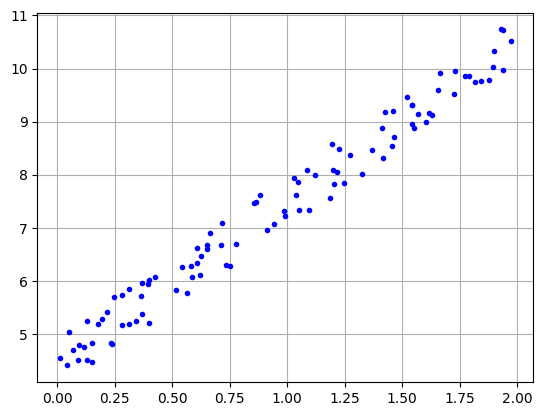

In [90]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(42)

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.rand(100, 1)

plt.plot(X, y, "b.")
plt.grid()
plt.show()

In [91]:
X_b = np.c_[np.ones((100, 1)), X]   # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T.dot(y))
theta_best


array([[4.51359766],
       [2.98323418]])

In [92]:
X_new = np.array([[0], [2]])

X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict




array([[ 4.51359766],
       [10.48006601]])

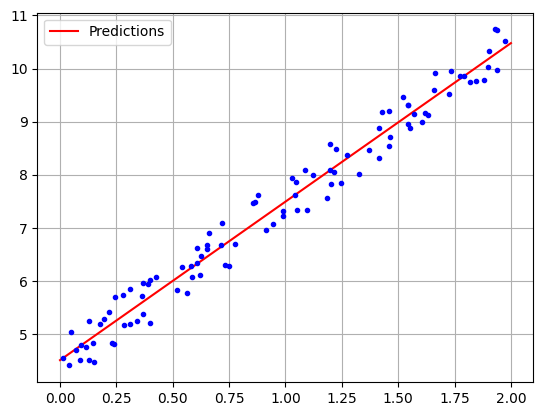

In [93]:
plt.plot(X_new, y_predict, "r-", label = "Predictions")
plt.plot(X, y, "b.")
plt.legend(loc = "upper left" )
plt.grid()
plt.show()

In [94]:
# Sckit-learn's equivalent code


from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_



(array([4.51359766]), array([[2.98323418]]))

In [95]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [96]:
# Batch Gradient Descent
eta = 0.1   # learnign rate
n_iterations = 1000
m = 100


theta = np.random.rand(2, 1)    # random initialization


for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)   # Gradient Descent Algorithm
    theta = theta - eta * gradients
    
theta



array([[4.51359766],
       [2.98323418]])

In [97]:
# Stochastic Gradient Descent (Using simulated annealing)
m = 100

n_epochs = 50
t0, t1 = 5, 50   # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.rand(2, 1)    # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index: random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
    #print(theta)





In [98]:
theta

array([[4.52035641],
       [2.98600484]])

In [99]:
from sklearn.linear_model import SGDRegressor

sgd_regressor = SGDRegressor(max_iter = 50, penalty = None, eta0 = 0.1)
sgd_regressor.fit(X, y.ravel())




SGDRegressor(eta0=0.1, max_iter=50, penalty=None)

In [100]:
sgd_regressor.intercept_, sgd_regressor.coef_

(array([4.50306422]), array([3.00667898]))

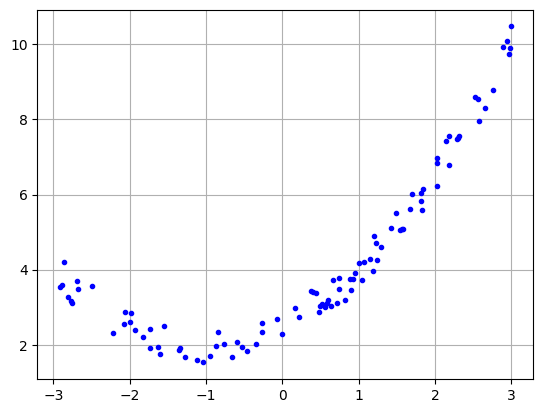

In [101]:
# Polynomial Regression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)


plt.plot(X, y, "b.")
plt.grid()
plt.show()

In [102]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree = 2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0], X_poly[0]


(array([2.99335567]), array([2.99335567, 8.96017818]))

In [103]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.44744008]), array([[1.02612412, 0.50812125]]))

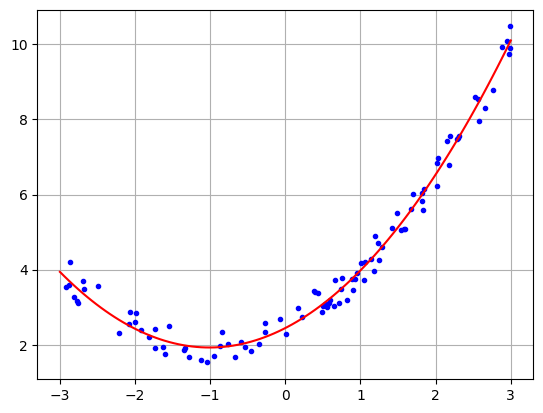

In [104]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-")
plt.grid()
plt.show()

In [105]:
# Learning Curves

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), "r+-", label = "train")
    plt.plot(np.sqrt(val_errors), "b-", label = "val")
    plt.axis([0, 80, 0, 2])
    plt.legend(loc = "upper left")
    plt.show()




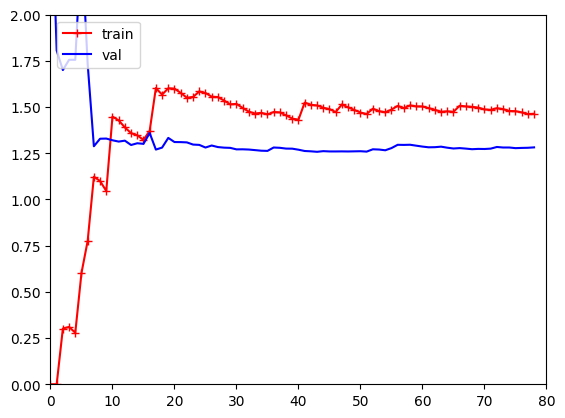

In [106]:
plot_learning_curves(lin_reg, X, y)

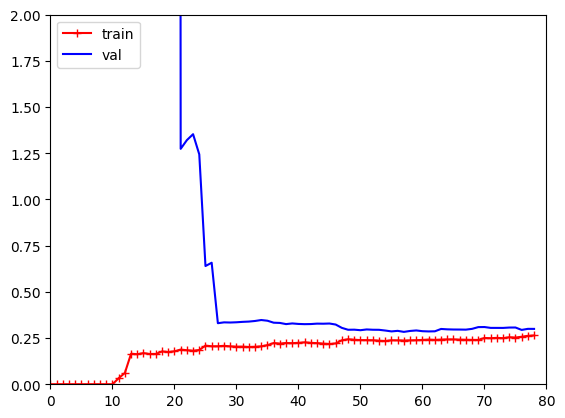

In [107]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(PolynomialFeatures(degree=10, include_bias=False), LinearRegression())

plot_learning_curves(polynomial_regression, X, y)



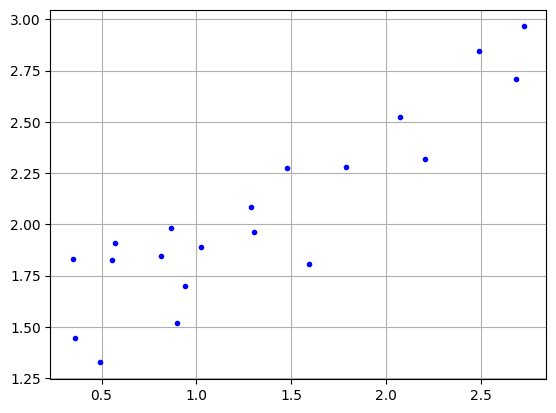

array([[2.13576832]])

In [108]:
# Ridge Regression

m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.rand(m, 1) / 1.5

plt.plot(X, y, "b.")
plt.grid()
plt.show()

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])



In [109]:
sgd_regressor = SGDRegressor(penalty="l2")

sgd_regressor.fit(X, y.ravel())
sgd_regressor.predict([[1.5]])




array([2.0793482])

In [110]:
# Lasso Regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)    # We can use SGDRegressor(penalty="l1"). They are same.
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])



array([2.1126616])

In [111]:
# Elastic Net
# It is between Ridge and Lasso regressions
# Mix ratio r = 0 means Ridge, r = 1 means Lasso

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])




array([2.12177065])

In [112]:
# Early stopping

from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Creating quadratic dataset and split it

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 : , 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False), StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)


sgd_regressor = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float("inf")

for epoch in range(n_epochs):
    sgd_regressor.fit(X_train_prep, y_train)
    y_valid_predict = sgd_regressor.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_regressor)


best_valid_rmse, best_model, best_epoch


(2.408570926293389, SGDRegressor(eta0=0.002, penalty=None, random_state=42), 0)

In [113]:
from sklearn import datasets

iris = datasets.load_iris()
iris.keys()
#iris["DESCR"]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [114]:
print(iris["target"])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [115]:
print(iris["DESCR"])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [116]:
X = iris["data"][ : , 3: ]
y = (iris["target"] == 2)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)

LogisticRegression()

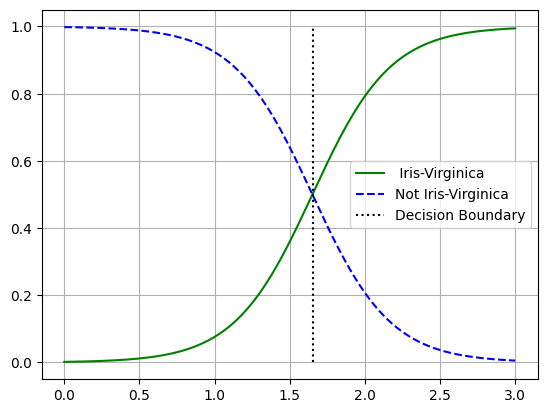

In [117]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_regression.predict_proba(X_new)
decision_boundary = X_new[y_proba[ : , 1] >= 0.5][0, 0]

plt.plot(X_new, y_proba[ : , 1], "g-", label = " Iris-Virginica")
plt.plot(X_new, y_proba[ : , 0], "b--", label = "Not Iris-Virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", label="Decision Boundary")
plt.grid()
plt.legend()
plt.show()


In [118]:
decision_boundary

1.6516516516516517

In [119]:
X = iris["data"][ : , (2, 3)]
y = iris["target"]


softmax_regression  = LogisticRegression(multi_class = "multinomial", solver = "lbfgs", C = 10)
softmax_regression.fit(X, y)
softmax_regression.predict([[5, 2]])


array([2])

In [120]:
softmax_regression.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

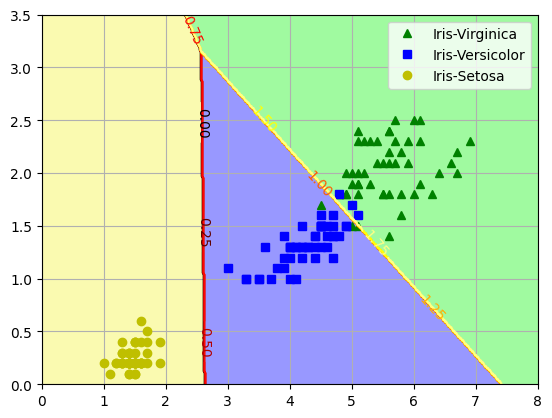

In [126]:
# Trying to visualize

from matplotlib.colors import ListedColormap

custom_map = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1), np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_regression.predict_proba(X_new)
y_predict = softmax_regression.predict(X_new)


zz1 = y_proba[ : , 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)


plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label = "Iris-Virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label = "Iris-Versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label = "Iris-Setosa")


plt.contourf(x0, x1, zz, cmap = custom_map)
contour = plt.contour(x0, x1, zz, cmap = "hot")
plt.clabel(contour, inline = 1)
plt.legend()
plt.grid()
plt.show()








